
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJcvCSi0kUANIioWV2LGXe29S_F94ezVXT8Q&usqp=CAU" style="float:right" width="400" >

## **Procesamiento de NPL & Analisis de Sentimientos**

### Omar Urena

### **Configuracion de la API de Kaggle y Descarga del conjunto de Datos**

In [1]:
#Configuracion

from google.colab import files
!pip install -q kaggle

In [2]:
#Subir API como kaggle.json (Propio perfil de Kaggle)
upload = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Crear crea un directorio llamado .kaggle en la ruta /root/
!mkdir -p /root/.kaggle

#mueve el archivo kaggle.json al directorio recién creado /root/.kaggle/
!mv kaggle.json /root/.kaggle/

In [4]:
#Descargamos Dataset
#Fuente Datos Kaggle: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?resource=download

!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 85.8MB/s]


In [5]:
#Descomprimir Dataset
!unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
#importamos las libreria para manejo de los datos.
import pandas as pd
import numpy as np

In [7]:

#Importamos train dataset
df_train=pd.read_csv('/content/train.csv')

#Importamos test dataset
df_test=pd.read_csv('/content/test.csv')

In [8]:
#Exploramos la estructura del dataset de entrenamiento
#Objetivo indicado en la web de Kaggle para el dataset
#Label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
#Exploramos la estructura del dataset de prueba

df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


El paquete tweet-preprocessor es una biblioteca de Python que facilita la limpieza y preprocesamiento de texto específicamente diseñada para tweets de Twitter. Ayuda a procesar y limpiar tweets para diversas tareas de análisis de texto, como análisis de sentimientos, clasificación de texto, extracción de información, etc.

Algunas de las funciones principales que tweet-preprocessor proporciona son:

Limpiar menciones de usuario: Elimina las menciones de usuario en un tweet, por ejemplo, convierte "@username" en una cadena vacía.

Limpiar hashtags: Elimina los hashtags en un tweet, por ejemplo, convierte "#hashtag" en una cadena vacía.

Limpiar URLs: Elimina las URL en un tweet, por ejemplo, convierte "https://example.com" en una cadena vacía.

Limpiar caracteres especiales: Remueve caracteres especiales, símbolos, emojis y otros elementos no deseados del texto.

Limpiar espacios en blanco: Elimina espacios en blanco adicionales y convierte múltiples espacios en blanco en uno solo.

Decodificación de HTML: Convierte las entidades HTML (por ejemplo, &amp;, &lt;, &gt;) en sus caracteres correspondientes.

In [11]:
#Instalación de Tweet-Preprocessor para hacer Data Profiling
!pip install tweet-preprocessor

REPLACE_NO_SPACE: Esta expresión regular se utiliza para eliminar ciertos caracteres del texto. Cada conjunto de paréntesis representa un grupo de caracteres que queremos eliminar. Por ejemplo, (\.) representa el punto, (\;) representa el punto y coma, (\:) representa los dos puntos, y así sucesivamente. Estos caracteres se reemplazarán por una cadena vacía, lo que significa que serán eliminados del texto.

REPLACE_WITH_SPACE: Esta expresión regular se utiliza para reemplazar ciertos patrones en el texto con un espacio en blanco. Por ejemplo, (<br\s/><br\s/?) representa una etiqueta HTML <br> que se reemplazará con un espacio en blanco. -, / y : también se reemplazarán con un espacio en blanco. Esto se logra colocando un espacio en blanco después del último paréntesis de cada grupo.

In [12]:
# Eliminamos los caracteres especiales con expresiones regulares
import re

#Identificación de signos de puntuación a eliminar del dataset
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [13]:
import preprocessor as p

# Se crea una función para limpiar los tweets combinando el preprocessor y las expresiones regulares
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # Transformación en minúscula de los tweets
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [14]:
# Limpieza del dataset de entrenamiento
train_tweet = clean_tweets(df_train["tweet"])
train_tweet = pd.DataFrame(data= train_tweet, columns=['tweet'])

In [15]:
# Se repite el procedimiento en el datset de test
test_tweet = clean_tweets(df_test["tweet"])
test_tweet = pd.DataFrame(data= test_tweet, columns=['tweet'])

In [16]:
#Si comparamos el resultado con el dataset original podemos apreciar cómo se han eliminado muchos elementos que generaban ruído
train_tweet.head()

,tweet
0,when a father is dysfunctional and is so selfi...
1,thanks for credit i cant use cause they dont o...
2,bihday your majesty
3,i love u take with u all the time in ur
4,factsguide society now


In [17]:
#Dataset Original
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
from sklearn.model_selection import train_test_split

# Extraemos las label del dataset
y = df_train.label.values

# Efectuamos train test split
x_train, x_test, y_train, y_test = train_test_split(train_tweet.values, y,
                                                    stratify=y,
                                                    random_state=0,
                                                    test_size=0.2, shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Ahora vamos a vectorizar empleando CountVectorizer para mostrar un ejemplo de funcionamiento

documents = ["This is class is amazing",
             "I like studying at IEBS!",
             "Please ask any question that you may have",
             "omar enmanuel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())

,amazing,any,ask,at,class,enmanuel,have,iebs,is,like,may,omar,please,question,studying,that,this,you
0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Aplicamos CountVectorizer al dataset

from sklearn.feature_extraction.text import CountVectorizer

#Vectorizamos los tweets para la construcción del modelo
vectorizer = CountVectorizer(binary=True, stop_words='english')

#Creamos un diccionario de vocabulario con el texto original de entrenamiento
lista = (x_train.tolist() + x_test.tolist())
flat_list = [x for xs in lista for x in xs]
vectorizer.fit(flat_list)

# Transformamos los documentos en una matriz de términos
x_train_vec = vectorizer.transform(x_train.flatten())
x_test_vec = vectorizer.transform(x_test.flatten())

In [ ]:
from sklearn import svm
# Creamos un modelo de clasificación basado en Máquinas Soporte de Vectores
svm = svm.SVC(kernel = 'linear', probability=True)

# Ajustamos el modelo en bvase a los datos de entrenamiento
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# Efectuamos la clasificación y predicción en el conjunto de test
y_pred_svm = svm.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score
print("El Accuracy score para SVC es: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

El Accuracy score para SVC es:  95.66713592992335 %


###**Probando otros Modelos**

Podemos observar que de manera basica el super vector machine tiene mejor rendimiento basandonos solo en la presicion.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression()
log_model = log.fit(x_train_vec, y_train)
accuracy = cross_val_score(log_model,
                                     x_test_vec,
                                     y_test,
                                     cv = 20).mean()

print("El Accuracy score para LogisticRegression es: ", accuracy * 100, '%')

El Accuracy score para LogisticRegression es:  94.35305642633229 %


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_vec, y_train)
accuracy = cross_val_score(xgb_model,
                            x_test_vec,
                            y_test,
                            cv = 20).mean()

print("El Accuracy score para XGBClassifier es: ", accuracy * 100, '%')

El Accuracy score para XGBClassifier es:  94.36892633228841 %


### **Visualización WordCloud**

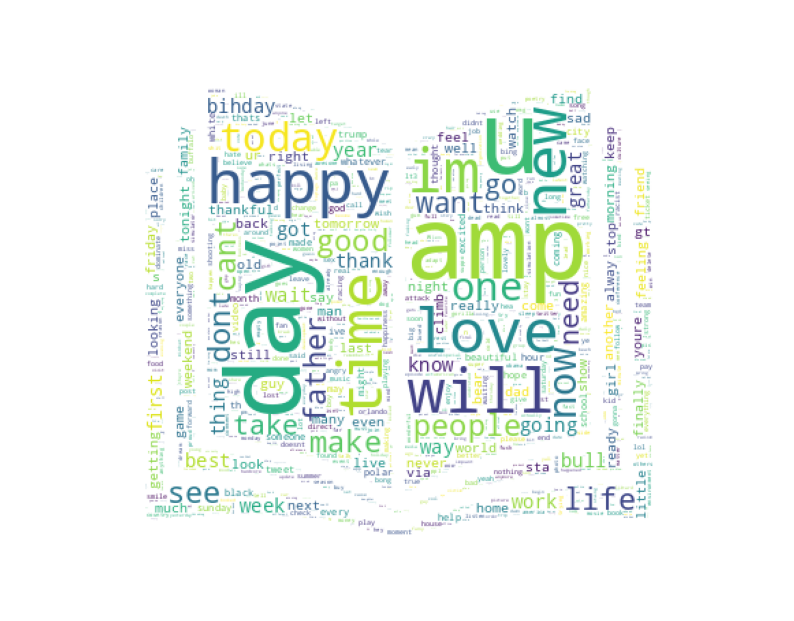

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

tw_mask = np.array(Image.open('/content/book-logo-1.jpg'))

text = " ".join(i for i in df_train.tweet)

wc = WordCloud(background_color = "white",
               width = 300, mask = tw_mask,
               height = 300,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc)
plt.axis("off")
plt.show;

### **Analisis de Sentimiento usando Text Blob**

TextBlob es una biblioteca de procesamiento de lenguaje natural (PLN) diseñada para simplificar el trabajo con texto en Python. Es una herramienta de procesamiento de lenguaje natural de código abierto que proporciona una interfaz sencilla para llevar a cabo tareas comunes de PLN, como análisis de sentimiento, extracción de frases clave, traducción de texto, corrección ortográfica, tokenización y más.

In [ ]:
# Limpieza del dataset para el analisis con la funcion creada anteriormente "clean_tweets"
train_clean= clean_tweets(df_train["tweet"])
df = df_train
df['tweet'] = train_clean

In [ ]:
#importamos el modelo pre entrenado sobe analisis de sentimientos.
from textblob import TextBlob

In [ ]:
# funcion para el analalisis de sentimiento con text Blob

def analisis(df):
    df['TextBlob_score'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    df['Label_TextBlob'] = df['TextBlob_score'].apply(lambda x: 'positive' if x > 0.0 else ('neutral' if x == 0.0 else 'negative'))
    return df

In [ ]:
#Aplicamos la funcion al dataset, en especifico a la columna tweet y agregamos las estiquedad original de la clasificacion de los tweet para observar los dos analisis.
#Observamos que independientemente de que el tweet sea racista o no, no necesariamente tiene un sentiemiento correlacionada a ser positivo o negativo.
df = analisis(df)
df['label_Desc']= df['label'].apply(lambda x: 'Racist & Sexist' if x == 1  else 'Non Racist')

In [ ]:
df.head(10)


,id,label,tweet,TextBlob_score,Label_TextBlob,label_Desc
0,1,0,when a father is dysfunctional and is so selfi...,-0.5,negative,Non Racist
1,2,0,thanks for credit i cant use cause they dont o...,0.2,positive,Non Racist
2,3,0,bihday your majesty,0.0,neutral,Non Racist
3,4,0,i love u take with u all the time in ur,0.5,positive,Non Racist
4,5,0,factsguide society now,0.0,neutral,Non Racist
5,6,0,2 2 huge fan fare and big talking before they ...,0.2,positive,Non Racist
6,7,0,camping tomorrow danny,0.0,neutral,Non Racist
7,8,0,the next school year is the year for exams can...,0.0,neutral,Non Racist
8,9,0,we won love the land,0.5,positive,Non Racist
9,10,0,welcome here im its so,0.8,positive,Non Racist


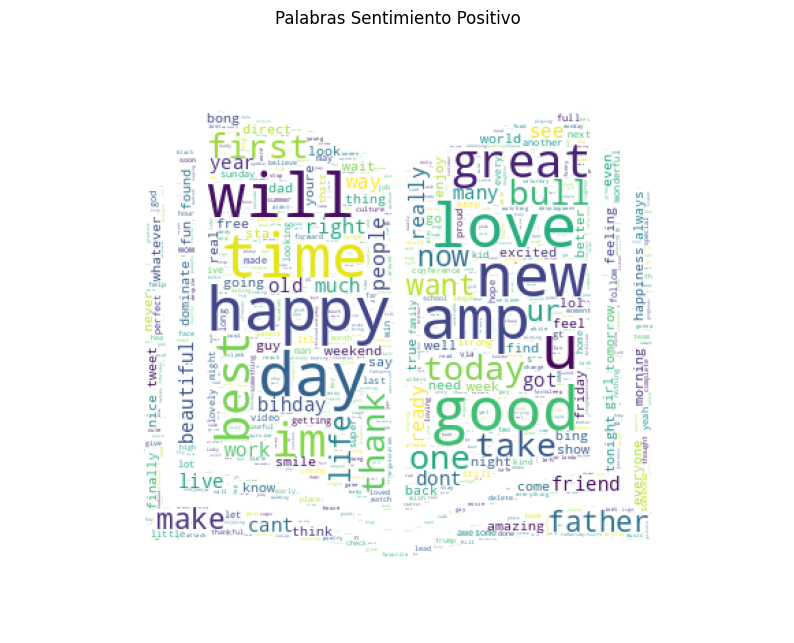

In [ ]:
#Nube de palabras donde el tweet es positivo
tw_mask = np.array(Image.open('/content/book-logo-1.jpg'))

text = " ".join(i for i in df[df['Label_TextBlob'] == 'positive']['tweet'])

wc = WordCloud(background_color = "white",
               width = 300, mask = tw_mask,
               height = 300,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc)
plt.axis("off")
plt.title("Palabras Sentimiento Positivo")
plt.show;

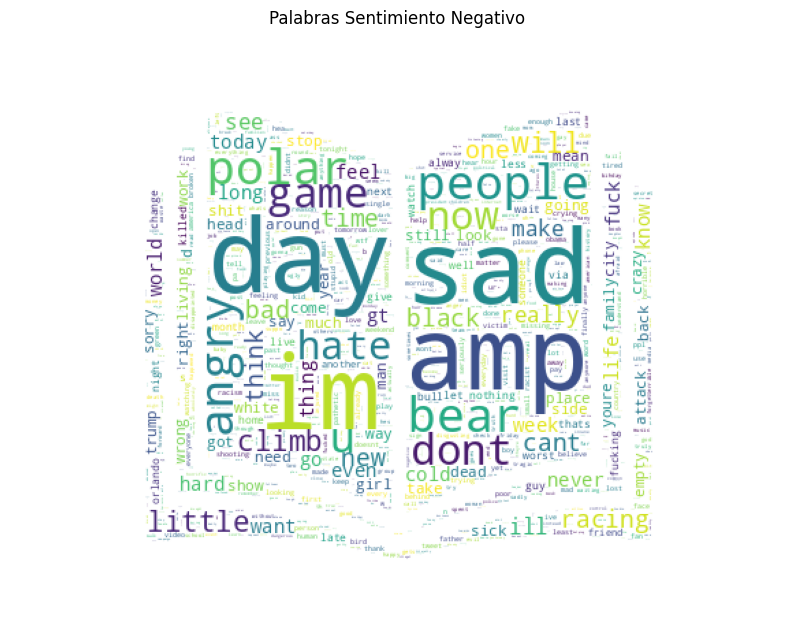

In [ ]:
#Nube de palabras donde el tweet es Negativo
tw_mask = np.array(Image.open('/content/book-logo-1.jpg'))

text = " ".join(i for i in df[df['Label_TextBlob'] == 'negative']['tweet'])

wc = WordCloud(background_color = "white",
               width = 300, mask = tw_mask,
               height = 300,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc)
plt.axis("off")
plt.title("Palabras Sentimiento Negativo")
plt.show;

##**1-Sentiment Classification Using Transformers**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 98.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from tqdm.notebook import tqdm # Mostar el progreso de la interaciones en un barra

In [ ]:
#Motrar el conjunto de datos a utilizar

df.head()

,id,label,tweet,TextBlob_score,Label_TextBlob,label_Desc
0,1,0,when a father is dysfunctional and is so selfi...,-0.5,negative,Non Racist
1,2,0,thanks for credit i cant use cause they dont o...,0.2,positive,Non Racist
2,3,0,bihday your majesty,0.0,neutral,Non Racist
3,4,0,i love u take with u all the time in ur,0.5,positive,Non Racist
4,5,0,factsguide society now,0.0,neutral,Non Racist


**Definir el modelo**

El modelo "cardiffnlp/twitter-roberta-base-sentiment-latest" es una variante de RoBERTa, una arquitectura de red neuronal basada en Transformers, que ha sido específicamente pre-entrenada en datos de Twitter para realizar tareas de análisis de sentimientos.

In [ ]:
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
s_clasificador = pipeline("sentiment-analysis", model= model_path, tokenizer=model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**Prueba**

In [ ]:
s_clasificador(df.iloc[0][2])

[{'label': 'negative', 'score': 0.8875747919082642}]

In [ ]:
# funcion para el analalisis de sentimiento con transformer

resultado_transf = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  tweet = row['tweet']
  myid = row['id']
  resultado_transf[myid] = s_clasificador(tweet)


  0%|          | 0/31962 [00:00<?, ?it/s]

In [ ]:
#Guardar los resultados dek diccionario en un DataFrame
df_transf = pd.DataFrame(resultado_transf).T
df_transf.head()


,0
1,"{'label': 'negative', 'score': 0.8875747919082..."
2,"{'label': 'negative', 'score': 0.8118955492973..."
3,"{'label': 'positive', 'score': 0.8328002095222..."
4,"{'label': 'positive', 'score': 0.9739763736724..."
5,"{'label': 'neutral', 'score': 0.6652584671974182}"


In [ ]:
# Separar la columna de resultado del diccionario
df_transf = df_transf[0].apply(pd.Series)
df_transf.head(5)

,label,score
0,negative,0.887575
1,negative,0.811896
2,positive,0.832800
3,positive,0.973976
4,neutral,0.665258


In [ ]:
# Renombrar index a Id, label a sentimiento
df_transf = df_transf.reset_index().rename(columns={'index': 'id', 'label':'label_Transformer', 'score':'Transformer_score'})
df_transf.head()

,id,label_Transformer,Transformer_score
0,0,negative,0.887575
1,1,negative,0.811896
2,2,positive,0.832800
3,3,positive,0.973976
4,4,neutral,0.665258


In [ ]:
# Unir al DataFrame Original
df = df.merge(df_transf, how = "left")
df.head(5)

,id,label,tweet,TextBlob_score,Label_TextBlob,label_Desc,label_Transformer,Transformer_score
0,1,0,when a father is dysfunctional and is so selfi...,-0.5,negative,Non Racist,negative,0.811896
1,2,0,thanks for credit i cant use cause they dont o...,0.2,positive,Non Racist,positive,0.832800
2,3,0,bihday your majesty,0.0,neutral,Non Racist,positive,0.973976
3,4,0,i love u take with u all the time in ur,0.5,positive,Non Racist,neutral,0.665258
4,5,0,factsguide society now,0.0,neutral,Non Racist,neutral,0.648831


##**2-Emotion Classification Using Transformers**

 el modelo "cardiffnlp/twitter-roberta-base-emotion-multilabel-latest" es una variante de RoBERTa pre-entrenada en datos de Twitter para realizar clasificación de emociones en texto. Su capacidad para capturar características específicas del lenguaje de Twitter y su eficiente arquitectura basada en Transformers lo convierten en una poderosa herramienta para realizar clasificación de emociones en texto proveniente de esta plataforma social. Además, su capacidad de asignar múltiples etiquetas de emoción a un texto lo hace adecuado para tareas que requieren una clasificación más detallada y rica de las emociones presentes.

In [ ]:
e_clasificador = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion-multilabel-latest", return_all_scores=False)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


**Prueba**

In [ ]:
e_clasificador(df.iloc[0][2])

[{'label': 'sadness', 'score': 0.9560047388076782}]

In [ ]:
# funcion para el analalisis de sentimiento con transformer

resultado_emociones = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  tweet = row['tweet']
  myid = row['id']
  resultado_emociones[myid] = e_clasificador(tweet)

  0%|          | 0/31962 [00:00<?, ?it/s]

In [ ]:
df_emociones = pd.DataFrame(resultado_emociones).T
df_emociones = df_emociones[0].apply(pd.Series)
df_emociones = df_emociones.reset_index().rename(columns={'index': 'id', 'label':'label_emocion', 'score':'emocion_score'})
df = df.merge(df_emociones, how = "left")
df.head(5)

,id,label,tweet,TextBlob_score,Label_TextBlob,label_Desc,label_Transformer,Transformer_score,label_emocion,emocion_score
0,1,0,when a father is dysfunctional and is so selfi...,-0.5,negative,Non Racist,negative,0.811896,sadness,0.956005
1,2,0,thanks for credit i cant use cause they dont o...,0.2,positive,Non Racist,positive,0.832800,anger,0.945566
2,3,0,bihday your majesty,0.0,neutral,Non Racist,positive,0.973976,joy,0.859179
3,4,0,i love u take with u all the time in ur,0.5,positive,Non Racist,neutral,0.665258,joy,0.973891
4,5,0,factsguide society now,0.0,neutral,Non Racist,neutral,0.648831,optimism,0.549565


##**Traduccion de los tweet al español**

In [ ]:
#Librera para la traduccion de texto
from googletrans import Translator


In [ ]:
# Función para traducir un texto del inglés al español utilizando googletrans
def translate_to_spanish(text):
  try:
    translator = Translator()
    translated_text = translator.translate(text, src='en', dest='es').text
    return str(translated_text)
  except Exception as e:
        # Si ocurre una excepción, simplemente devolvemos el texto original
        print(f"Error al traducir: {e}")
        return text

In [ ]:
def translate_to_spanish(text):
    blob = TextBlob(text)
    translated_text = blob.translate(to='es')
    return str(translated_text)

In [ ]:
translate_to_spanish(df.iloc[3][2])

'Te amo te llevas todo el tiempo en tu'

In [ ]:
df['original'] = df_train['tweet']

In [ ]:
df

,id,label,tweet,TextBlob_score,Label_TextBlob,label_Desc,label_Transformer,Transformer_score,label_emocion,emocion_score,original
0,1,0,when a father is dysfunctional and is so selfi...,-0.5,negative,Non Racist,negative,0.811896,sadness,0.956005,@user when a father is dysfunctional and is s...
1,2,0,thanks for credit i cant use cause they dont o...,0.2,positive,Non Racist,positive,0.832800,anger,0.945566,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,0.0,neutral,Non Racist,positive,0.973976,joy,0.859179,bihday your majesty
3,4,0,i love u take with u all the time in ur,0.5,positive,Non Racist,neutral,0.665258,joy,0.973891,#model i love u take with u all the time in ...
4,5,0,factsguide society now,0.0,neutral,Non Racist,neutral,0.648831,optimism,0.549565,factsguide: society now #motivation
...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu,0.0,neutral,Non Racist,neutral,0.594181,disgust,0.493410,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to w...,0.4,positive,Non Racist,negative,0.882207,joy,0.779084,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,-0.5,negative,Non Racist,neutral,0.715718,sadness,0.976426,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act,0.0,neutral,Racist & Sexist,positive,0.945391,anger,0.914259,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
# Salvamos la información en un archivo CSV
df.to_csv("Datos_tweet_procesado.csv", index = False, encoding='utf-8')